In [1]:
import madrigalWeb.madrigalWeb
import pylab
import numpy
import h5py
import datetime
import dateutil.parser
import re
%matplotlib inline

In [2]:
#CHANGE ME
user_fullname = "Student Example"
user_email = "isr.summer.school@gmail.com"
user_affiliation = "ISR Summer School 2022"

maddat = madrigalWeb.madrigalWeb.MadrigalData('http://cedar.openmadrigal.org/')

In [3]:
# instrument codes for Millstone Hill
instcodes={'MHO':30}

In [4]:
# start time
st=datetime.datetime(2018, 9, 4, 0,0)
et=datetime.datetime(2018, 9, 5, 0,0)

expList = maddat.getExperiments(instcodes['MHO'], 
                                st.year, st.month, st.day, st.hour, st.minute, st.second, 
                                et.year, et.month, et.day, et.hour, et.minute, et.second)
for exp in expList:
    print(exp)

id: 100194345
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100194345
url: http://cedar.openmadrigal.org/madtoc/experiments5/2018/mlh/04sep18p
name: High resolution F2 Peak Density (From Plasma Line)
siteid: 10
sitename: CEDAR
instcode: 30
instname: Millstone Hill IS Radar
startyear: 2018
startmonth: 9
startday: 4
starthour: 10
startmin: 38
startsec: 7
endyear: 2018
endmonth: 9
endday: 4
endhour: 16
endmin: 1
endsec: 34
isLocal: True
madrigalUrl: http://cedar.openmadrigal.org/
PI: Phil Erickson
PIEmail: perickson@haystack.mit.edu
uttimestamp: 1586213586
access: 2
Madrigal version: 3.2

id: 100194374
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100194374
url: http://cedar.openmadrigal.org/madtoc/experiments5/2018/mlh/04sep18
name: Rapid Plasma Line East
siteid: 10
sitename: CEDAR
instcode: 30
instname: Millstone Hill IS Radar
startyear: 2018
startmonth: 9
startday: 4
starthour: 8
startmin: 0
startsec: 17
endyear: 2018
endmonth: 9
endday

In [5]:
# multiple experiments on this day; select the first one (plasma line)
thisExp = expList[0]

In [6]:
# Select the correct experiment file (Plasma line peak density)
fileList = maddat.getExperimentFiles(thisExp.id)
thisFile=None
for file in fileList:
    if re.match('Plasma line',file.kindatdesc):
        print('Using: %s' % (file))
        thisFile=file
        break

Using: name: /opt/cedar3/experiments5/2018/mlh/04sep18p/mlh_pl_20180904.002.hdf5
kindat: 3415
kindatdesc: Plasma line peak densities
category: 1
status: Final
permission: 0
expId: 100194345
doi: https://w3id.org/cedar?experiment_list=experiments5/2018/mlh/04sep18p&file_list=mlh_pl_20180904.002.hdf5



In [7]:
# Download the file (should end up in this folder)       
filename=thisFile.name
outfilename=thisFile.name.split('/')[-1]
result = maddat.downloadFile(filename,outfilename, user_fullname, user_email, user_affiliation, 'hdf5')

In [8]:
# Load file and get data table
hz = h5py.File(outfilename,'r')
hztl = hz['Data']['Table Layout']

In [9]:
# List variables available
print(hztl.dtype)

[('year', '<i8'), ('month', '<i8'), ('day', '<i8'), ('hour', '<i8'), ('min', '<i8'), ('sec', '<i8'), ('recno', '<i8'), ('kindat', '<i8'), ('kinst', '<i8'), ('ut1_unix', '<f8'), ('ut2_unix', '<f8'), ('fof2', '<f8'), ('dfof2', '<f8'), ('nemax', '<f8'), ('dnemax', '<f8'), ('hmax', '<f8'), ('dhmax', '<f8'), ('gdalt', '<f8'), ('azm', '<f8'), ('elm', '<f8')]


In [10]:
# antenna codes for Millstone Hill
antcodes={'Zenith':32,
           'MISA':31}

In [11]:
# extract data separately from each antenna
indx1 = numpy.where(hztl['kinst']==antcodes['Zenith'])[0]
hztl_zenith = hztl[indx1]
indx2 = numpy.where(hztl['kinst']==antcodes['MISA'])[0]
hztl_misa = hztl[indx2]

In [12]:
# Build a time array for each
ut_zenith = 0.5*(hztl_zenith['ut1_unix'] + hztl_zenith['ut2_unix'])
dut_zenith = numpy.array([datetime.datetime.utcfromtimestamp(uut) for uut in ut_zenith])
ut_misa = 0.5*(hztl_misa['ut1_unix'] + hztl_misa['ut2_unix'])
dut_misa = numpy.array([datetime.datetime.utcfromtimestamp(uut) for uut in ut_misa])

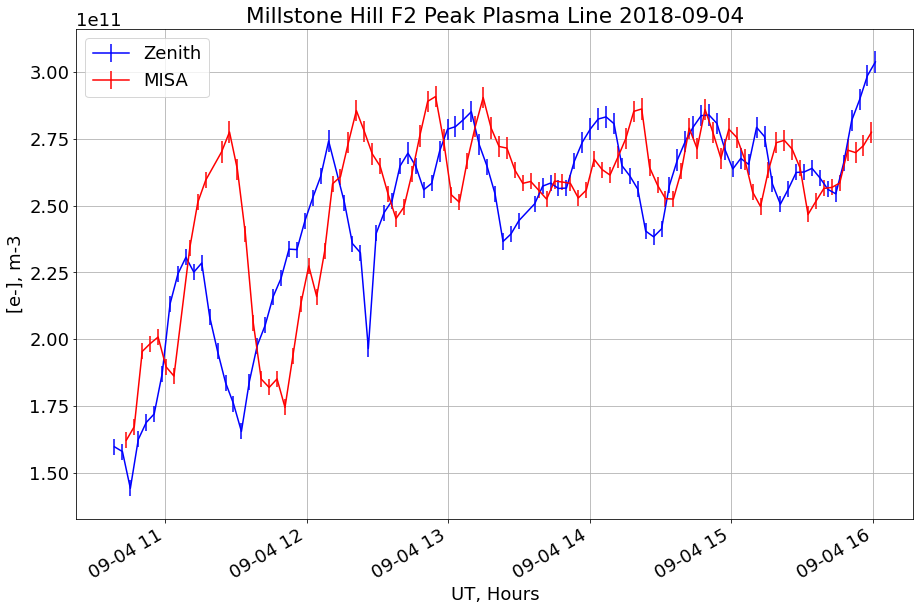

In [13]:
pylab.rcParams['figure.figsize']=(15,10)
pylab.rcParams['font.size']=18
pylab.figure()
pylab.errorbar(dut_zenith, hztl_zenith['nemax'], hztl_zenith['dnemax'], color='b', label='Zenith')
pylab.errorbar(dut_misa, hztl_misa['nemax'], hztl_misa['dnemax'], color='r', label='MISA')
pylab.ylabel('[e-], m-3')
pylab.xlabel('UT, Hours')
pylab.title('Millstone Hill F2 Peak Plasma Line %s' % (dut_zenith[0].strftime('%Y-%m-%d')))
pylab.grid()
pylab.legend()
pylab.gcf().autofmt_xdate()

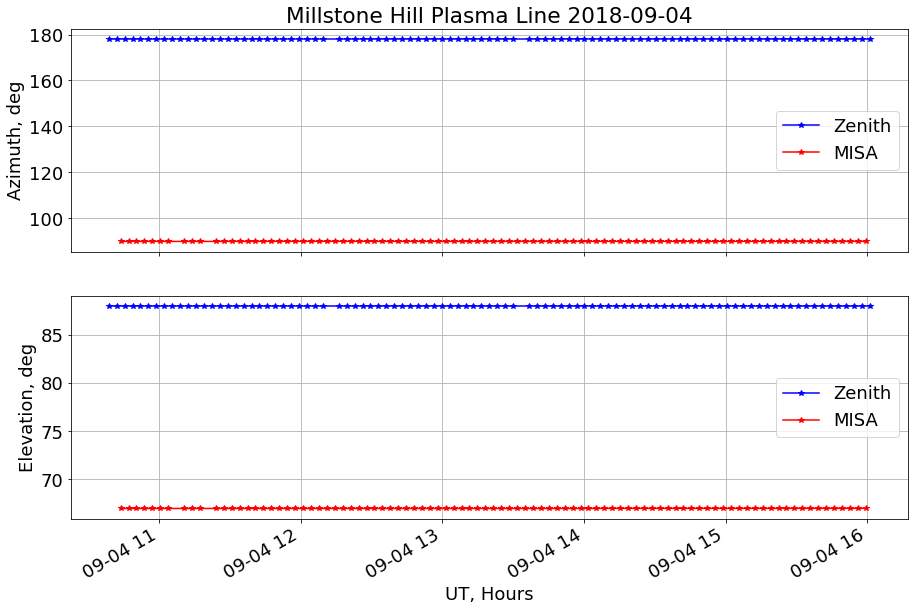

In [14]:
# which way was each antenna pointing?
pylab.rcParams['figure.figsize']=(15,10)
pylab.rcParams['font.size']=18

pylab.figure()

pylab.subplot(211)
pylab.plot(dut_zenith, hztl_zenith['azm'], color='b', marker='*', label='Zenith')
pylab.plot(dut_misa, hztl_misa['azm'], color='r', marker='*', label='MISA')
pylab.ylabel('Azimuth, deg')
pylab.title('Millstone Hill Plasma Line %s' % (dut_zenith[0].strftime('%Y-%m-%d')))
pylab.grid()
pylab.legend()

pylab.subplot(212)
pylab.plot(dut_zenith, hztl_zenith['elm'], color='b', marker='*', label='Zenith')
pylab.plot(dut_misa, hztl_misa['elm'], color='r', marker='*', label='MISA')
pylab.ylabel('Elevation, deg')
pylab.xlabel('UT, Hours')
pylab.grid()
pylab.legend()
pylab.gcf().autofmt_xdate()

# Questions

1. What is happening at 12 UT?

2. Why are the two antennas showing different variations?  What direction are they looking? Are the observed variations related in some way?

3. This data is from the F2 peak but altitude information is not available for this experiment (examining 'hmax' variable will show all NaNs).  How would you use other Millstone Hill data to find where that peak is?